# Foodie Project

**Business case:** There will be a foodie fair in your city next summer, and the organsers have contacted us because they are interested in performing an analysis of the world wide cuisines. They manage to obtain a dataset from different cuisines all over the world, together with the list of the most common ingredients.

Some of our strongest geographic and cultural associations are tied to a region's local foods, so they are interested to know more information regarding them in order to organise the different stands.

In [1]:
import json
import numpy as np 
import pandas as pd 

# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords

# sklearn 
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Other imports
from collections import Counter
import requests
import imageio
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib import pyplot as plt
from PIL import Image


In [2]:
import sys
sys.path.append('D:\Data Course\Projects\Food\Food-Project')

from My_functions_EDA import *
from fx_MLRegression import *

In [3]:
# Add the name of the file
data=json.load(open(r'../dataset/Ex 6.1. foodie_dataset.json'))

# and load it
#file = open(filename, 'rt')
#text = file.read()
#file.close()



In [4]:
df = pd.DataFrame(data)

In [5]:
df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [6]:
df.ingredients

0        [romaine lettuce, black olives, grape tomatoes...
1        [plain flour, ground pepper, salt, tomatoes, g...
2        [eggs, pepper, salt, mayonaise, cooking oil, g...
3                      [water, vegetable oil, wheat, salt]
4        [black pepper, shallots, cornflour, cayenne pe...
                               ...                        
39769    [light brown sugar, granulated sugar, butter, ...
39770    [KRAFT Zesty Italian Dressing, purple onion, b...
39771    [eggs, citrus fruit, raisins, sourdough starte...
39772    [boneless chicken skinless thigh, minced garli...
39773    [green chile, jalapeno chilies, onions, ground...
Name: ingredients, Length: 39774, dtype: object

In [7]:
df.cuisine.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [8]:
#Missing values in training set
print(df.isnull().sum())
print(df.info())

id             0
cuisine        0
ingredients    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB
None


# Exploring cuisine column

<AxesSubplot:ylabel='cuisine'>

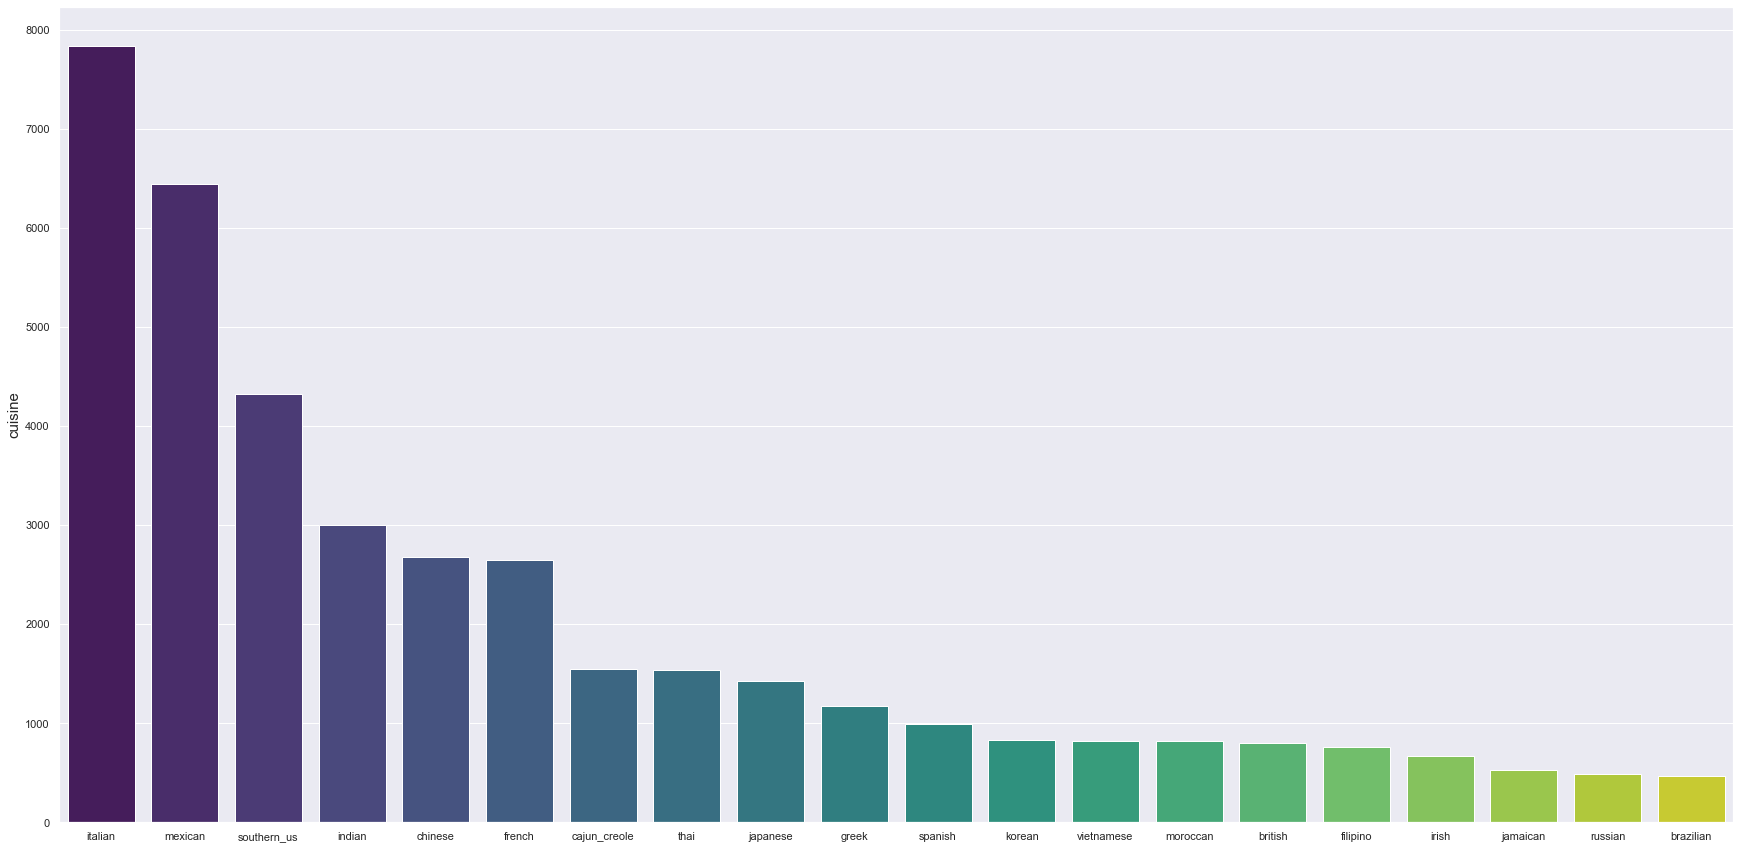

In [9]:
sns.set(rc={'figure.figsize':(30,15),
            'axes.labelsize': 15, 
            'font.size': 15, 
            'legend.fontsize': 12, 
            'axes.titlesize':15,
            'figure.facecolor': 'white',
            'font.family': ['sans-serif'],
            'legend.fancybox': True,
            'lines.color': 'C0',
            'xaxis.labellocation': 'center',
            'xtick.alignment': 'center',
            'legend.title_fontsize': 15,
            'legend.edgecolor': '0.9',
            'animation.ffmpeg_path': 'ffmpeg',
           })    

sns.barplot(df['cuisine'].value_counts().index,
            df['cuisine'].value_counts(),palette='viridis')

In [10]:
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [11]:
df['clean'] = df.ingredients.apply(', '.join)
df['clean'] = df['clean'].str.replace(',',' hola')

In [12]:
type(df.clean[0])

str

In [13]:
from collections import Counter

vocab = Counter()
for recipe in df['clean']:
    for word in recipe.split('hola'):
        vocab[word.strip()] += 1

In [14]:
vocab.most_common(100)

[('salt', 18049),
 ('onions', 7972),
 ('olive oil', 7972),
 ('water', 7457),
 ('garlic', 7380),
 ('sugar', 6434),
 ('garlic cloves', 6237),
 ('butter', 4848),
 ('ground black pepper', 4785),
 ('all-purpose flour', 4632),
 ('pepper', 4438),
 ('vegetable oil', 4385),
 ('eggs', 3388),
 ('soy sauce', 3296),
 ('kosher salt', 3113),
 ('green onions', 3078),
 ('tomatoes', 3058),
 ('large eggs', 2948),
 ('carrots', 2814),
 ('unsalted butter', 2782),
 ('ground cumin', 2747),
 ('extra-virgin olive oil', 2747),
 ('black pepper', 2627),
 ('milk', 2263),
 ('chili powder', 2036),
 ('oil', 1970),
 ('red bell pepper', 1946),
 ('purple onion', 1896),
 ('scallions', 1891),
 ('grated parmesan cheese', 1886),
 ('sesame oil', 1773),
 ('corn starch', 1757),
 ('ginger', 1755),
 ('baking powder', 1738),
 ('jalapeno chilies', 1730),
 ('dried oregano', 1707),
 ('chopped cilantro fresh', 1698),
 ('fresh lemon juice', 1679),
 ('diced tomatoes', 1624),
 ('fresh parsley', 1604),
 ('minced garlic', 1583),
 ('chicken

In [17]:
count_vectorizer = CountVectorizer(max_features = 1500)
train_vectors = count_vectorizer.fit_transform(df['clean'])
#pred_vectors = count_vectorizer.transform(pred["text2"])
train_vectors
#pred_vectors

<39774x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 797381 stored elements in Compressed Sparse Row format>

In [16]:
df

,id,cuisine,ingredients,clean
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce hola black olives hola grape t...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour hola ground pepper hola salt hola ...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs hola pepper hola salt hola mayonaise hola...
3,22213,indian,"[water, vegetable oil, wheat, salt]",water hola vegetable oil hola wheat hola salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper hola shallots hola cornflour hola...
...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",light brown sugar hola granulated sugar hola b...
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",KRAFT Zesty Italian Dressing hola purple onion...
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",eggs hola citrus fruit hola raisins hola sourd...
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",boneless chicken skinless thigh hola minced ga...


In [18]:
def tokenize(text):
    tokens=re.split('\W+',text)
    return tokens 

In [19]:
df['tokenized_text']=df['clean'].apply(lambda row : tokenize(row.lower()))
df.head()

,id,cuisine,ingredients,clean,tokenized_text
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce hola black olives hola grape t...,"[romaine, lettuce, hola, black, olives, hola, ..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour hola ground pepper hola salt hola ...,"[plain, flour, hola, ground, pepper, hola, sal..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs hola pepper hola salt hola mayonaise hola...,"[eggs, hola, pepper, hola, salt, hola, mayonai..."
3,22213,indian,"[water, vegetable oil, wheat, salt]",water hola vegetable oil hola wheat hola salt,"[water, hola, vegetable, oil, hola, wheat, hol..."
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper hola shallots hola cornflour hola...,"[black, pepper, hola, shallots, hola, cornflou..."


In [20]:
def remove_stopwords(text):
    stopwords=nltk.corpus.stopwords.words('english')

    clean_text=[word for word in text if word not in stopwords]
    return clean_text 


In [21]:
df['w_stop']=df['tokenized_text'].apply(lambda row : remove_stopwords(row))

In [22]:
df

,id,cuisine,ingredients,clean,tokenized_text,w_stop
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce hola black olives hola grape t...,"[romaine, lettuce, hola, black, olives, hola, ...","[romaine, lettuce, hola, black, olives, hola, ..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour hola ground pepper hola salt hola ...,"[plain, flour, hola, ground, pepper, hola, sal...","[plain, flour, hola, ground, pepper, hola, sal..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs hola pepper hola salt hola mayonaise hola...,"[eggs, hola, pepper, hola, salt, hola, mayonai...","[eggs, hola, pepper, hola, salt, hola, mayonai..."
3,22213,indian,"[water, vegetable oil, wheat, salt]",water hola vegetable oil hola wheat hola salt,"[water, hola, vegetable, oil, hola, wheat, hol...","[water, hola, vegetable, oil, hola, wheat, hol..."
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper hola shallots hola cornflour hola...,"[black, pepper, hola, shallots, hola, cornflou...","[black, pepper, hola, shallots, hola, cornflou..."
...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",light brown sugar hola granulated sugar hola b...,"[light, brown, sugar, hola, granulated, sugar,...","[light, brown, sugar, hola, granulated, sugar,..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",KRAFT Zesty Italian Dressing hola purple onion...,"[kraft, zesty, italian, dressing, hola, purple...","[kraft, zesty, italian, dressing, hola, purple..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",eggs hola citrus fruit hola raisins hola sourd...,"[eggs, hola, citrus, fruit, hola, raisins, hol...","[eggs, hola, citrus, fruit, hola, raisins, hol..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",boneless chicken skinless thigh hola minced ga...,"[boneless, chicken, skinless, thigh, hola, min...","[boneless, chicken, skinless, thigh, hola, min..."


In [23]:
import nltk


from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [24]:
def lemmatizer2(tokenized_text):
    lematize_text=[lemmatizer.lemmatize(word) for word in tokenized_text]
    return lematize_text

In [25]:
df['lemmatizer_text']=df['w_stop'].apply(lambda row : lemmatizer2(row))
df.head()

,id,cuisine,ingredients,clean,tokenized_text,w_stop,lemmatizer_text
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce hola black olives hola grape t...,"[romaine, lettuce, hola, black, olives, hola, ...","[romaine, lettuce, hola, black, olives, hola, ...","[romaine, lettuce, hola, black, olive, hola, g..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour hola ground pepper hola salt hola ...,"[plain, flour, hola, ground, pepper, hola, sal...","[plain, flour, hola, ground, pepper, hola, sal...","[plain, flour, hola, ground, pepper, hola, sal..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs hola pepper hola salt hola mayonaise hola...,"[eggs, hola, pepper, hola, salt, hola, mayonai...","[eggs, hola, pepper, hola, salt, hola, mayonai...","[egg, hola, pepper, hola, salt, hola, mayonais..."
3,22213,indian,"[water, vegetable oil, wheat, salt]",water hola vegetable oil hola wheat hola salt,"[water, hola, vegetable, oil, hola, wheat, hol...","[water, hola, vegetable, oil, hola, wheat, hol...","[water, hola, vegetable, oil, hola, wheat, hol..."
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper hola shallots hola cornflour hola...,"[black, pepper, hola, shallots, hola, cornflou...","[black, pepper, hola, shallots, hola, cornflou...","[black, pepper, hola, shallot, hola, cornflour..."


In [26]:
type(df.lemmatizer_text[35563])

list

In [27]:
df['final'] = df.lemmatizer_text.apply(' '.join)


In [28]:
df

,id,cuisine,ingredients,clean,tokenized_text,w_stop,lemmatizer_text,final
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce hola black olives hola grape t...,"[romaine, lettuce, hola, black, olives, hola, ...","[romaine, lettuce, hola, black, olives, hola, ...","[romaine, lettuce, hola, black, olive, hola, g...",romaine lettuce hola black olive hola grape to...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour hola ground pepper hola salt hola ...,"[plain, flour, hola, ground, pepper, hola, sal...","[plain, flour, hola, ground, pepper, hola, sal...","[plain, flour, hola, ground, pepper, hola, sal...",plain flour hola ground pepper hola salt hola ...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs hola pepper hola salt hola mayonaise hola...,"[eggs, hola, pepper, hola, salt, hola, mayonai...","[eggs, hola, pepper, hola, salt, hola, mayonai...","[egg, hola, pepper, hola, salt, hola, mayonais...",egg hola pepper hola salt hola mayonaise hola ...
3,22213,indian,"[water, vegetable oil, wheat, salt]",water hola vegetable oil hola wheat hola salt,"[water, hola, vegetable, oil, hola, wheat, hol...","[water, hola, vegetable, oil, hola, wheat, hol...","[water, hola, vegetable, oil, hola, wheat, hol...",water hola vegetable oil hola wheat hola salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper hola shallots hola cornflour hola...,"[black, pepper, hola, shallots, hola, cornflou...","[black, pepper, hola, shallots, hola, cornflou...","[black, pepper, hola, shallot, hola, cornflour...",black pepper hola shallot hola cornflour hola ...
...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",light brown sugar hola granulated sugar hola b...,"[light, brown, sugar, hola, granulated, sugar,...","[light, brown, sugar, hola, granulated, sugar,...","[light, brown, sugar, hola, granulated, sugar,...",light brown sugar hola granulated sugar hola b...
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",KRAFT Zesty Italian Dressing hola purple onion...,"[kraft, zesty, italian, dressing, hola, purple...","[kraft, zesty, italian, dressing, hola, purple...","[kraft, zesty, italian, dressing, hola, purple...",kraft zesty italian dressing hola purple onion...
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",eggs hola citrus fruit hola raisins hola sourd...,"[eggs, hola, citrus, fruit, hola, raisins, hol...","[eggs, hola, citrus, fruit, hola, raisins, hol...","[egg, hola, citrus, fruit, hola, raisin, hola,...",egg hola citrus fruit hola raisin hola sourdou...
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",boneless chicken skinless thigh hola minced ga...,"[boneless, chicken, skinless, thigh, hola, min...","[boneless, chicken, skinless, thigh, hola, min...","[boneless, chicken, skinless, thigh, hola, min...",boneless chicken skinless thigh hola minced ga...


In [68]:
df[df.final.str.contains('chicken')]

,id,cuisine,ingredients,clean,tokenized_text,w_stop,lemmatizer_text,final
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs hola pepper hola salt hola mayonaise hola...,"[eggs, hola, pepper, hola, salt, hola, mayonai...","[eggs, hola, pepper, hola, salt, hola, mayonai...","[egg, hola, pepper, hola, salt, hola, mayonais...",egg hola pepper hola salt hola mayonaise hola ...
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper hola shallots hola cornflour hola...,"[black, pepper, hola, shallots, hola, cornflou...","[black, pepper, hola, shallots, hola, cornflou...","[black, pepper, hola, shallot, hola, cornflour...",black pepper hola shallot hola cornflour hola ...
14,31908,italian,"[fresh parmesan cheese, butter, all-purpose fl...",fresh parmesan cheese hola butter hola all-pur...,"[fresh, parmesan, cheese, hola, butter, hola, ...","[fresh, parmesan, cheese, hola, butter, hola, ...","[fresh, parmesan, cheese, hola, butter, hola, ...",fresh parmesan cheese hola butter hola purpose...
17,1420,italian,"[italian seasoning, broiler-fryer chicken, may...",italian seasoning hola broiler-fryer chicken h...,"[italian, seasoning, hola, broiler, fryer, chi...","[italian, seasoning, hola, broiler, fryer, chi...","[italian, seasoning, hola, broiler, fryer, chi...",italian seasoning hola broiler fryer chicken h...
19,8152,vietnamese,"[soy sauce, vegetable oil, red bell pepper, ch...",soy sauce hola vegetable oil hola red bell pep...,"[soy, sauce, hola, vegetable, oil, hola, red, ...","[soy, sauce, hola, vegetable, oil, hola, red, ...","[soy, sauce, hola, vegetable, oil, hola, red, ...",soy sauce hola vegetable oil hola red bell pep...
...,...,...,...,...,...,...,...,...
39754,27082,vietnamese,"[jasmine rice, bay leaves, sticky rice, rotiss...",jasmine rice hola bay leaves hola sticky rice ...,"[jasmine, rice, hola, bay, leaves, hola, stick...","[jasmine, rice, hola, bay, leaves, hola, stick...","[jasmine, rice, hola, bay, leaf, hola, sticky,...",jasmine rice hola bay leaf hola sticky rice ho...
39761,6487,chinese,"[honey, chicken breast halves, cilantro leaves...",honey hola chicken breast halves hola cilantro...,"[honey, hola, chicken, breast, halves, hola, c...","[honey, hola, chicken, breast, halves, hola, c...","[honey, hola, chicken, breast, half, hola, cil...",honey hola chicken breast half hola cilantro l...
39762,26646,indian,"[curry powder, salt, chicken, water, vegetable...",curry powder hola salt hola chicken hola water...,"[curry, powder, hola, salt, hola, chicken, hol...","[curry, powder, hola, salt, hola, chicken, hol...","[curry, powder, hola, salt, hola, chicken, hol...",curry powder hola salt hola chicken hola water...
39768,7377,mexican,"[shredded cheddar cheese, crushed cheese crack...",shredded cheddar cheese hola crushed cheese cr...,"[shredded, cheddar, cheese, hola, crushed, che...","[shredded, cheddar, cheese, hola, crushed, che...","[shredded, cheddar, cheese, hola, crushed, che...",shredded cheddar cheese hola crushed cheese cr...


In [29]:
df['final']= df['final'].str.replace(' hola' ,',')
df.head()

,id,cuisine,ingredients,clean,tokenized_text,w_stop,lemmatizer_text,final
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce hola black olives hola grape t...,"[romaine, lettuce, hola, black, olives, hola, ...","[romaine, lettuce, hola, black, olives, hola, ...","[romaine, lettuce, hola, black, olive, hola, g...","romaine lettuce, black olive, grape tomato, ga..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour hola ground pepper hola salt hola ...,"[plain, flour, hola, ground, pepper, hola, sal...","[plain, flour, hola, ground, pepper, hola, sal...","[plain, flour, hola, ground, pepper, hola, sal...","plain flour, ground pepper, salt, tomato, grou..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs hola pepper hola salt hola mayonaise hola...,"[eggs, hola, pepper, hola, salt, hola, mayonai...","[eggs, hola, pepper, hola, salt, hola, mayonai...","[egg, hola, pepper, hola, salt, hola, mayonais...","egg, pepper, salt, mayonaise, cooking oil, gre..."
3,22213,indian,"[water, vegetable oil, wheat, salt]",water hola vegetable oil hola wheat hola salt,"[water, hola, vegetable, oil, hola, wheat, hol...","[water, hola, vegetable, oil, hola, wheat, hol...","[water, hola, vegetable, oil, hola, wheat, hol...","water, vegetable oil, wheat, salt"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper hola shallots hola cornflour hola...,"[black, pepper, hola, shallots, hola, cornflou...","[black, pepper, hola, shallots, hola, cornflou...","[black, pepper, hola, shallot, hola, cornflour...","black pepper, shallot, cornflour, cayenne pepp..."


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               39774 non-null  int64 
 1   cuisine          39774 non-null  object
 2   ingredients      39774 non-null  object
 3   clean            39774 non-null  object
 4   tokenized_text   39774 non-null  object
 5   w_stop           39774 non-null  object
 6   lemmatizer_text  39774 non-null  object
 7   final            39774 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.4+ MB


In [40]:
data= df.copy()

In [41]:
data.drop(axis = 1, columns=["clean", "id", "tokenized_text","w_stop","lemmatizer_text"], inplace= True)

In [42]:
data.loc[143,:]

cuisine                                     mexican
ingredients    [granulated sugar, large egg whites]
final             granulated sugar, large egg white
Name: 143, dtype: object

In [43]:
data.to_csv('../dataset/00-Data_Clean.csv')

# Working with the new Data 

In [49]:
df_1 = pd.read_csv('../dataset/00-Data_Clean.csv')

In [50]:
# checking shape ...
print("The dataset has {} rows and {} columns.".format(*df_1.shape))

# ... and duplicates
print("It contains {} duplicates.".format(df_1.duplicated().sum()))

The dataset has 39774 rows and 4 columns.
It contains 0 duplicates.


In [51]:
df_1.drop(columns="Unnamed: 0",inplace= True)

In [52]:
df_1

,cuisine,ingredients,final
0,greek,"['romaine lettuce', 'black olives', 'grape tom...","romaine lettuce, black olive, grape tomato, ga..."
1,southern_us,"['plain flour', 'ground pepper', 'salt', 'toma...","plain flour, ground pepper, salt, tomato, grou..."
2,filipino,"['eggs', 'pepper', 'salt', 'mayonaise', 'cooki...","egg, pepper, salt, mayonaise, cooking oil, gre..."
3,indian,"['water', 'vegetable oil', 'wheat', 'salt']","water, vegetable oil, wheat, salt"
4,indian,"['black pepper', 'shallots', 'cornflour', 'cay...","black pepper, shallot, cornflour, cayenne pepp..."
...,...,...,...
39769,irish,"['light brown sugar', 'granulated sugar', 'but...","light brown sugar, granulated sugar, butter, w..."
39770,italian,"['KRAFT Zesty Italian Dressing', 'purple onion...","kraft zesty italian dressing, purple onion, br..."
39771,irish,"['eggs', 'citrus fruit', 'raisins', 'sourdough...","egg, citrus fruit, raisin, sourdough starter, ..."
39772,chinese,"['boneless chicken skinless thigh', 'minced ga...","boneless chicken skinless thigh, minced garlic..."


In [53]:
df_1.cuisine.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [54]:
df_1.cuisine.unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

## Seeing the Lenght of the Recipes

In [55]:
df_1.loc[143,:]

cuisine                                         mexican
ingredients    ['granulated sugar', 'large egg whites']
final                 granulated sugar, large egg white
Name: 143, dtype: object

In [56]:
df_1['Len'] = df_1['final'].apply(lambda row: len(row.split(', ')))

In [57]:
df_1.Len.value_counts().sort_values(ascending=False)

9     3758
10    3677
8     3541
11    3514
7     3320
12    3144
13    2690
6     2659
14    2288
5     1874
15    1810
16    1441
17    1156
4     1113
18     901
19     603
3      548
20     514
21     313
22     218
2      193
23     143
24      91
25      74
26      46
28      27
1       22
29      21
27      20
30      15
31      11
33       4
32       4
36       4
40       3
35       3
34       3
38       2
49       2
52       1
65       1
43       1
59       1
Name: Len, dtype: int64

[Text(0.5, 1.0, 'Len Distribution')]

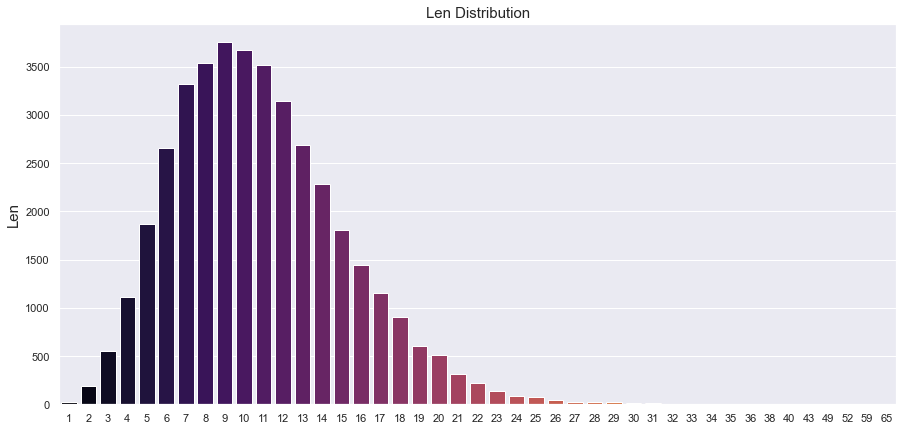

In [58]:
sns.set(rc={'figure.figsize':(15,7),
            'axes.labelsize': 15, 
            'font.size': 20, 
            'legend.fontsize': 12, 
            'axes.titlesize':15,
            'figure.facecolor': 'white',
            'font.family': ['sans-serif'],
            'legend.fancybox': True,
            'lines.color': 'C0',
            'xaxis.labellocation': 'center',
            'xtick.alignment': 'center',
            'legend.title_fontsize': 15,
            'legend.edgecolor': '0.9',
            'animation.ffmpeg_path': 'ffmpeg',
           })    

sns.barplot(df_1['Len'].value_counts().index,
            df_1['Len'].value_counts(),palette='inferno').set(title='Len Distribution')

In [59]:
a = df_1.groupby(['cuisine']).agg({'Len': [np.count_nonzero,np.min,np.max,np.mean,]})
a

Len                     
             count_nonzero amin amax       mean
cuisine                                        
brazilian              467    2   59   9.526767
british                804    2   30   9.712687
cajun_creole          1546    2   31  12.634541
chinese               2673    2   38  11.994014
filipino               755    2   38  10.006623
french                2646    1   31   9.828798
greek                 1175    1   27  10.194894
indian                3003    1   49  12.708292
irish                  667    2   27   9.308846
italian               7838    1   65   9.934294
jamaican               526    2   35  12.224335
japanese              1423    1   34   9.737878
korean                 830    2   29  11.284337
mexican               6438    1   52  10.902454
moroccan               821    2   31  12.913520
russian                489    2   25  10.235174
southern_us           4320    1   40   9.652778
spanish                989    1   35  10.442872
thai                  1539    1   40  12.555556
vietnamese             825    1   31  12.682424

### Reduce the Size

In [64]:
df_less = df_1[df_1.Len < 16]
df_less.reset_index(drop=True, inplace = True)
print("We have", df_less.shape[0] , "recipes with less than 16 elements, and We had " , df_1.shape[0])

We have 34151 recipes with less than 16 elements, and We had  39774


In [65]:
df_less

,cuisine,ingredients,final,Len
0,greek,"['romaine lettuce', 'black olives', 'grape tom...","romaine lettuce, black olive, grape tomato, ga...",9
1,southern_us,"['plain flour', 'ground pepper', 'salt', 'toma...","plain flour, ground pepper, salt, tomato, grou...",11
2,filipino,"['eggs', 'pepper', 'salt', 'mayonaise', 'cooki...","egg, pepper, salt, mayonaise, cooking oil, gre...",12
3,indian,"['water', 'vegetable oil', 'wheat', 'salt']","water, vegetable oil, wheat, salt",4
4,jamaican,"['plain flour', 'sugar', 'butter', 'eggs', 'fr...","plain flour, sugar, butter, egg, fresh ginger ...",12
...,...,...,...,...
34146,mexican,"['shredded cheddar cheese', 'crushed cheese cr...","shredded cheddar cheese, crushed cheese cracke...",10
34147,irish,"['light brown sugar', 'granulated sugar', 'but...","light brown sugar, granulated sugar, butter, w...",12
34148,italian,"['KRAFT Zesty Italian Dressing', 'purple onion...","kraft zesty italian dressing, purple onion, br...",7
34149,irish,"['eggs', 'citrus fruit', 'raisins', 'sourdough...","egg, citrus fruit, raisin, sourdough starter, ...",12


<Figure size 576x360 with 0 Axes>

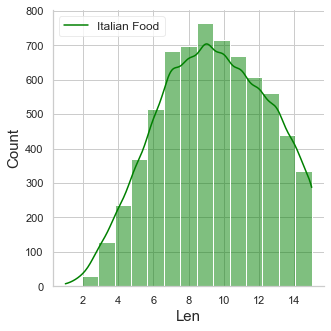

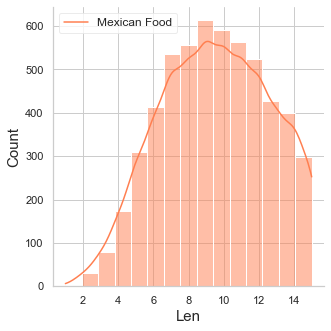

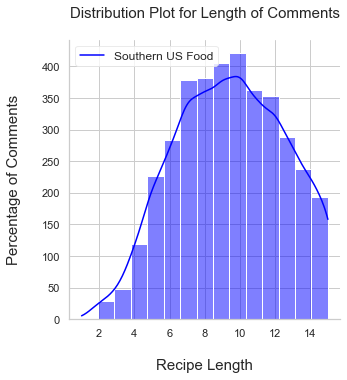

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.displot(df_less.Len[df_1.cuisine == "italian"], kde=True, bins =15, color='green')
plt.legend([ 'Italian Food'])
sns.displot(df_less.Len[df_1.cuisine == "mexican"], kde=True, bins =15,  color='coral')
plt.legend(['Mexican Food'])
sns.displot(df_less.Len[df_1.cuisine == "southern_us"], kde=True, bins =15, color='blue')
plt.legend([ 'Southern US Food'])

plt.title('Distribution Plot for Length of Comments\n')

plt.xlabel('\nRecipe Length')
plt.ylabel('Percentage of Comments\n');

In [67]:
df_less.groupby(['cuisine']).agg({'Len': [np.min,np.max,np.mean, np.count_nonzero]} )

Len                              
             amin amax       mean count_nonzero
cuisine                                        
brazilian       2   15   8.051980           404
british         2   15   8.868852           732
cajun_creole    2   15  10.561082          1146
chinese         2   15  10.675614          2198
filipino        2   15   9.257225           692
french          1   15   8.917539          2389
greek           1   15   9.431925          1065
indian          1   15  10.343420          2181
irish           2   15   8.780604           629
italian         1   15   9.245233          7238
jamaican        2   15  10.203474           403
japanese        1   15   8.762539          1276
korean          2   15  10.198324           716
mexican         1   15   9.431145          5439
moroccan        2   15  10.451670           569
russian         2   15   9.241935           434
southern_us     1   15   8.937312          3988
spanish         1   15   9.471591           880
thai            1   15  10.770519          1194
vietnamese      1   15   9.980969           578

In [68]:
df_less[df_less.Len < 4]

,cuisine,ingredients,final,Len
68,vietnamese,"['sweetened condensed milk', 'ice', 'espresso']","sweetened condensed milk, ice, espresso",3
77,korean,"['water', 'barley']","water, barley",2
94,mexican,"['chocolate bars', 'marshmallows', 'cinnamon g...","chocolate bar, marshmallow, cinnamon graham cr...",3
125,mexican,"['granulated sugar', 'large egg whites']","granulated sugar, large egg white",2
336,italian,"['kale leaves', 'chicken noodle soup', 'cannel...","kale leaf, chicken noodle soup, cannellini bean",3
...,...,...,...,...
33863,japanese,"['mochi', 'soy sauce', 'nori']","mochi, soy sauce, nori",3
33875,british,"['brandy', 'powdered sugar', 'unsalted butter']","brandy, powdered sugar, unsalted butter",3
33886,filipino,"['brown sugar', 'bananas', 'vegetable oil']","brown sugar, banana, vegetable oil",3
34088,mexican,"['warm water', 'masa']","warm water, masa",2


## Filtering Meat - NoMeat // Sugar - NotSugar

In [70]:
import re
def pattern_searcher(search_str:str, search_list:str):

    search_obj = re.search(search_list, search_str)
    if search_obj :
        return_str = search_str[search_obj.start(): search_obj.end()]
    else:
        return_str = 'No'
    return return_str


In [71]:
meat = ['liver ', 'thigh', 'shrimp' , 'steak',  'chorizo', 'sausage', 'pork', 'kosher', 'turkey', 'fillet', 
        'fryer',  'fish', 'loin',  'serrano', 'crab', 'beef',  'burger', 'blood', 'prawn',  'chop', 'cod',  
        'duck',  'lamb', 'oyster', 'tenderloin', 'lard', 'cutlet', 'clam', 'heart', 'rabe', 'shell',  'meat',  
        'salmon', 'ear', 'trout',  "chicken", "pepperoni", "bacon", " ham " ,"veal",  "salami" ,"drumstick" , 
        "breast" ,"goose", "burger",  "lobster", "poultry", "tripe","mutton"]


pattern = '|'.join(meat)

In [72]:
sweet = ['sugar', "chocolate", 'honey' ]

pattern2 = '|'.join(sweet)

In [73]:
df_less['meat'] = df_1['final'].apply(lambda x: pattern_searcher(search_str=x, search_list=pattern))


In [85]:
a = [df_less.meat.value_counts()]
a = a[1:11]
a

[]

In [86]:
df_less

,cuisine,ingredients,final,Len,meat,sugar
0,greek,"['romaine lettuce', 'black olives', 'grape tom...","romaine lettuce, black olive, grape tomato, ga...",9,No,No
1,southern_us,"['plain flour', 'ground pepper', 'salt', 'toma...","plain flour, ground pepper, salt, tomato, grou...",11,No,No
2,filipino,"['eggs', 'pepper', 'salt', 'mayonaise', 'cooki...","egg, pepper, salt, mayonaise, cooking oil, gre...",12,chicken,No
3,indian,"['water', 'vegetable oil', 'wheat', 'salt']","water, vegetable oil, wheat, salt",4,No,No
4,jamaican,"['plain flour', 'sugar', 'butter', 'eggs', 'fr...","plain flour, sugar, butter, egg, fresh ginger ...",12,chicken,No
...,...,...,...,...,...,...
34146,mexican,"['shredded cheddar cheese', 'crushed cheese cr...","shredded cheddar cheese, crushed cheese cracke...",10,pork,sugar
34147,irish,"['light brown sugar', 'granulated sugar', 'but...","light brown sugar, granulated sugar, butter, w...",12,No,No
34148,italian,"['KRAFT Zesty Italian Dressing', 'purple onion...","kraft zesty italian dressing, purple onion, br...",7,kosher,No
34149,irish,"['eggs', 'citrus fruit', 'raisins', 'sourdough...","egg, citrus fruit, raisin, sourdough starter, ...",12,chop,No


[Text(0.5, 1.0, 'Ten Meets most frequency')]

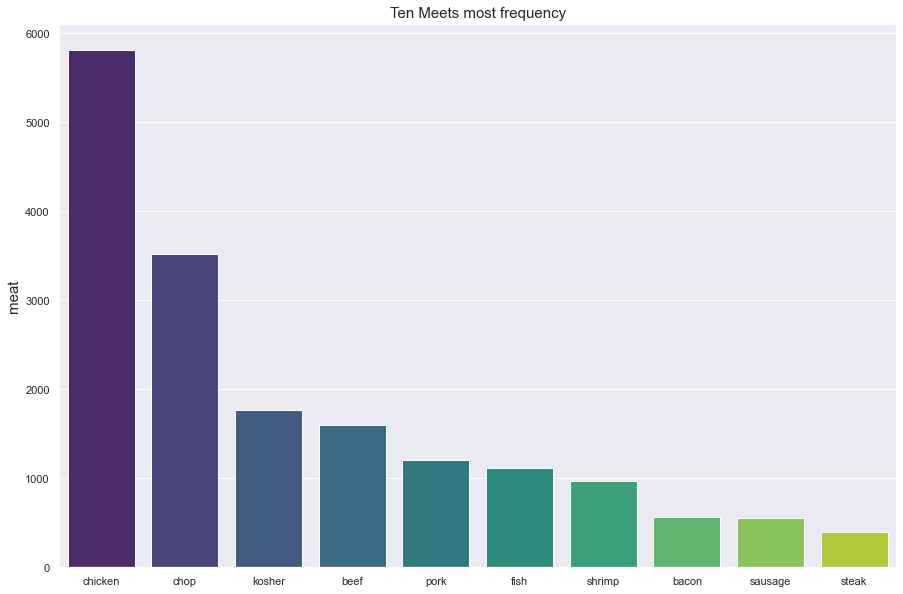

In [76]:
sns.set(rc={'figure.figsize':(15,10),
            'axes.labelsize': 15, 
            'font.size': 20, 
            'legend.fontsize': 12, 
            'axes.titlesize':15,
            'figure.facecolor': 'white',
            'font.family': ['sans-serif'],
            'legend.fancybox': True,
            'lines.color': 'C0',
            'xaxis.labellocation': 'center',
            'xtick.alignment': 'center',
            'legend.title_fontsize': 15,
            'legend.edgecolor': '0.9',
            'animation.ffmpeg_path': 'ffmpeg',
           })    

sns.barplot(df_less['meat'].value_counts().index[1:11],
            df_less['meat'].value_counts()[1:11],palette='viridis').set(title='Ten Meets most frequency')

In [77]:
df_less['sugar'] = df_1['final'].apply(lambda x: pattern_searcher(search_str=x, search_list=pattern2))

In [88]:
nomeat = df_less[df_less['meat'] == "No"]
nomeat.reset_index(drop=True, inplace = True)
nomeat.head()

,cuisine,ingredients,final,Len,meat,sugar
0,greek,"['romaine lettuce', 'black olives', 'grape tom...","romaine lettuce, black olive, grape tomato, ga...",9,No,No
1,southern_us,"['plain flour', 'ground pepper', 'salt', 'toma...","plain flour, ground pepper, salt, tomato, grou...",11,No,No
2,indian,"['water', 'vegetable oil', 'wheat', 'salt']","water, vegetable oil, wheat, salt",4,No,No
3,spanish,"['olive oil', 'salt', 'medium shrimp', 'pepper...","olive oil, salt, medium shrimp, pepper, garlic...",13,No,sugar
4,mexican,"['olive oil', 'purple onion', 'fresh pineapple...","olive oil, purple onion, fresh pineapple, pork...",13,No,sugar


[Text(0.5, 1.0, 'Distribution of the NoMeet recipes by cuisine')]

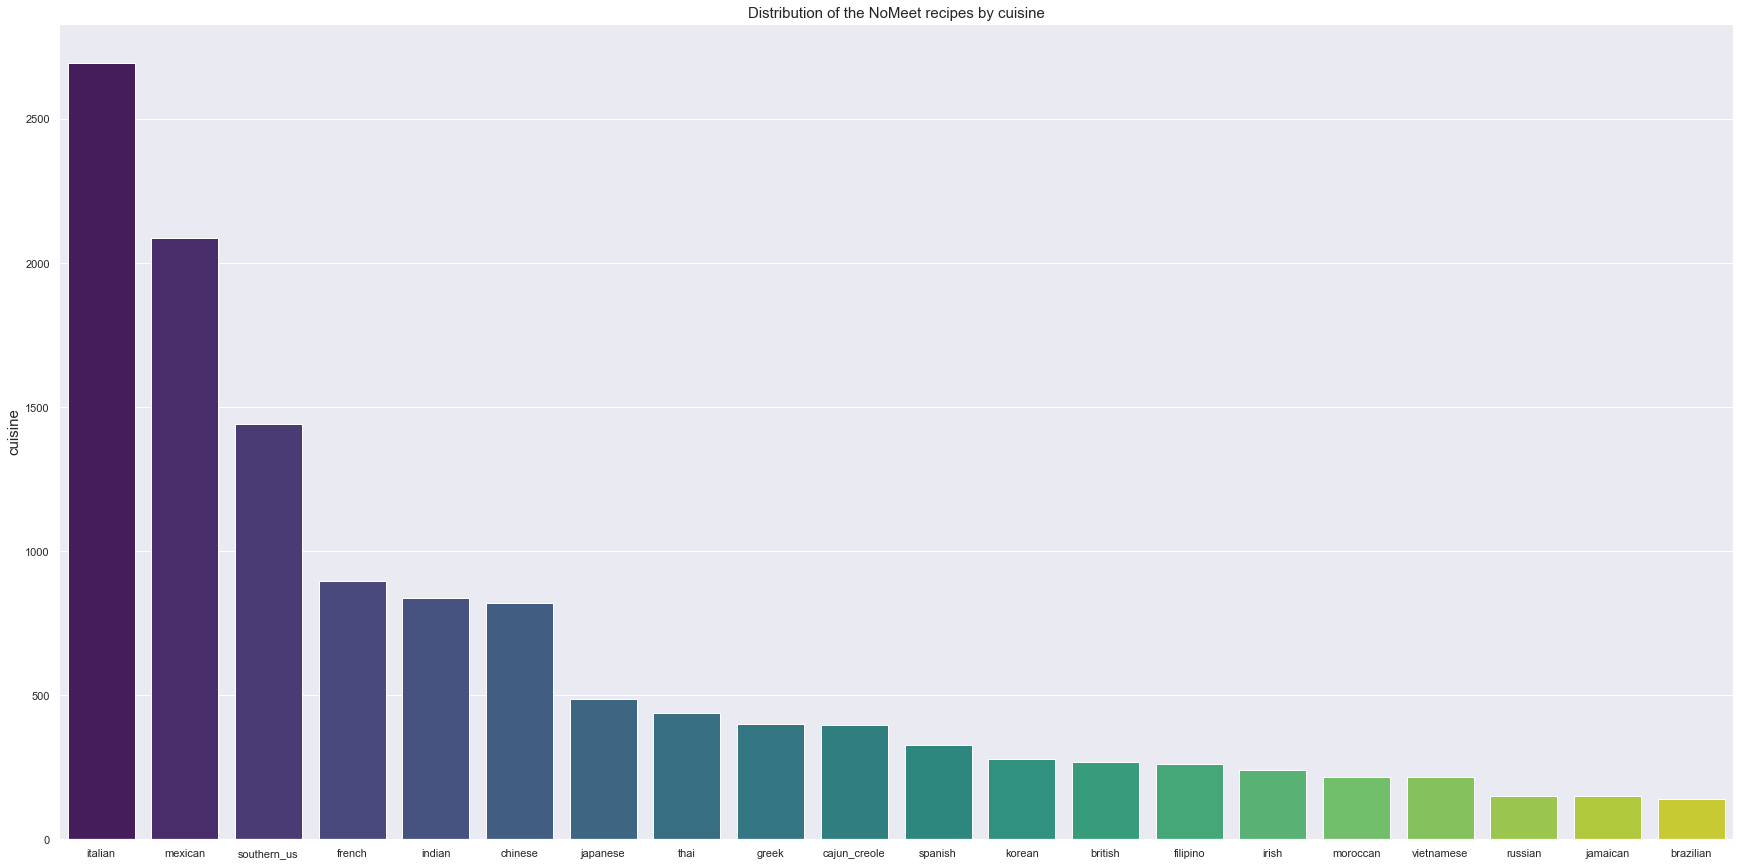

In [89]:
sns.set(rc={'figure.figsize':(30,15),
            'axes.labelsize': 15, 
            'font.size': 15, 
            'legend.fontsize': 12, 
            'axes.titlesize':15,
            'figure.facecolor': 'white',
            'font.family': ['sans-serif'],
            'legend.fancybox': True,
            'lines.color': 'C0',
            'xaxis.labellocation': 'center',
            'xtick.alignment': 'center',
            'legend.title_fontsize': 15,
            'legend.edgecolor': '0.9',
            'animation.ffmpeg_path': 'ffmpeg',
           })    

sns.barplot(nomeat['cuisine'].value_counts().index,
            nomeat['cuisine'].value_counts(),palette='viridis', ).set(title='Distribution of the NoMeet recipes by cuisine')

In [90]:
meat = df_less[df_less['meat'] != "No"]
meat.head(3)

,cuisine,ingredients,final,Len,meat,sugar
2,filipino,"['eggs', 'pepper', 'salt', 'mayonaise', 'cooki...","egg, pepper, salt, mayonaise, cooking oil, gre...",12,chicken,No
4,jamaican,"['plain flour', 'sugar', 'butter', 'eggs', 'fr...","plain flour, sugar, butter, egg, fresh ginger ...",12,chicken,No
6,italian,"['sugar', 'pistachio nuts', 'white almond bark...","sugar, pistachio nut, white almond bark, flour...",10,shrimp,No


[Text(0.5, 1.0, 'Distribution of the Meet recipes by cuisine')]

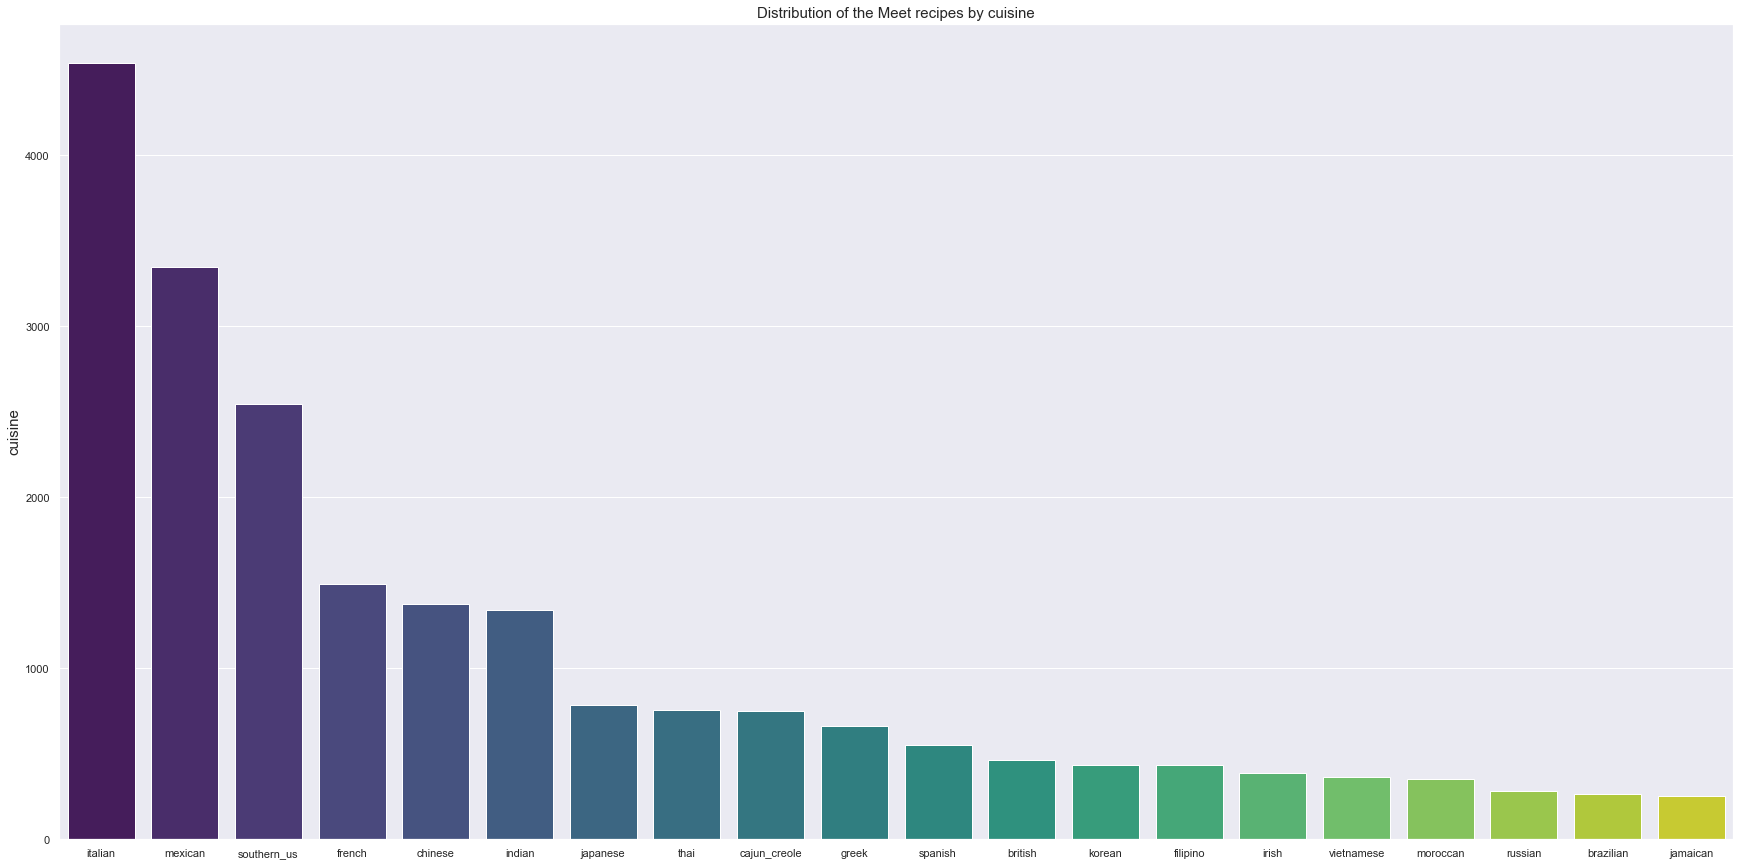

In [91]:
sns.set(rc={'figure.figsize':(30,15),
            'axes.labelsize': 15, 
            'font.size': 15, 
            'legend.fontsize': 12, 
            'axes.titlesize':15,
            'figure.facecolor': 'white',
            'font.family': ['sans-serif'],
            'legend.fancybox': True,
            'lines.color': 'C0',
            'xaxis.labellocation': 'center',
            'xtick.alignment': 'center',
            'legend.title_fontsize': 15,
            'legend.edgecolor': '0.9',
            'animation.ffmpeg_path': 'ffmpeg',
           })    

sns.barplot(meat['cuisine'].value_counts().index,
            meat['cuisine'].value_counts(),palette='viridis').set(title='Distribution of the Meet recipes by cuisine')

# Tagging the ingredients

In [92]:
import nltk
# nltk.download('averaged_perceptron_tagger')
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent



In [93]:
# Add a new column with the preprocess
df_less["prepros"] = df_less["final"].apply(lambda x: preprocess(x))


In [94]:
jj = []
for a in df_less["prepros"]:
    for row in a:
        if 'JJ' in row:
            jj.append(row[0])
jj

['black',
 'garlic',
 'purple',
 'garbanzo',
 'feta',
 'flour',
 'black',
 'green',
 'yellow',
 'vegetable',
 'green',
 'garlic',
 'yellow',
 'vegetable',
 'flour',
 'fresh',
 'olive',
 'garlic',
 'flat',
 'white',
 'white',
 'olive',
 'olive',
 'fresh',
 'black',
 'fresh',
 'garlic',
 'extra',
 'olive',
 'flat',
 'sweet',
 'olive',
 'sharp',
 'swiss',
 'canola',
 'black',
 'low',
 'fresh',
 'dry',
 'green',
 'white',
 'sesame',
 'canola',
 'garlic',
 'red',
 'italian',
 'hot',
 'red',
 'extra',
 'olive',
 'fresh',
 'garlic',
 'fine',
 'flat',
 'fresh',
 'fat',
 'free',
 'fresh',
 'cheese',
 'ground',
 'black',
 'fat',
 'free',
 'vegetable',
 'red',
 'red',
 'sweet',
 'greek',
 'lemon',
 'italian',
 'zesty',
 'italian',
 'hot',
 'asian',
 'lime',
 'vegetable',
 'red',
 'yellow',
 'garlic',
 'green',
 'fresh',
 'creamy',
 'fresh',
 'thai',
 'purple',
 'low',
 'red',
 'yellow',
 'extra',
 'arrowroot',
 'fresh',
 'sesame',
 'red',
 'flat',
 'olive',
 'red',
 'olive',
 'lemon',
 'lo',
 'li

In [95]:
nn = []
for a in df_less["prepros"]:
    for row in a:
        if 'NN' in row:
            nn.append(row[0])
nn

['romaine',
 'lettuce',
 'olive',
 'grape',
 'tomato',
 'pepper',
 'onion',
 'bean',
 'cheese',
 'ground',
 'pepper',
 'salt',
 'tomato',
 'ground',
 'pepper',
 'thyme',
 'egg',
 'tomato',
 'corn',
 'meal',
 'milk',
 'oil',
 'egg',
 'pepper',
 'salt',
 'mayonaise',
 'oil',
 'chicken',
 'breast',
 'powder',
 'onion',
 'soy',
 'sauce',
 'butter',
 'liver',
 'water',
 'oil',
 'wheat',
 'salt',
 'sugar',
 'butter',
 'egg',
 'ginger',
 'root',
 'salt',
 'ground',
 'cinnamon',
 'milk',
 'vanilla',
 'extract',
 'ground',
 'ginger',
 'sugar',
 'powder',
 'oil',
 'salt',
 'medium',
 'shrimp',
 'pepper',
 'cilantro',
 'jalapeno',
 'leaf',
 'parsley',
 'skirt',
 'steak',
 'vinegar',
 'sea',
 'salt',
 'bay',
 'leaf',
 'chorizo',
 'sausage',
 'sugar',
 'pistachio',
 'nut',
 'almond',
 'bark',
 'flour',
 'vanilla',
 'extract',
 'oil',
 'almond',
 'extract',
 'egg',
 'powder',
 'cranberry',
 'oil',
 'purple',
 'onion',
 'pineapple',
 'pork',
 'poblano',
 'pepper',
 'corn',
 'tortilla',
 'cheddar',
 '

In [96]:
vocabjj = Counter(jj)
vocabnn = Counter(nn)

In [97]:
vocabjj.most_common(15)

[('fresh', 12249),
 ('garlic', 11496),
 ('olive', 9532),
 ('black', 7929),
 ('red', 6580),
 ('green', 6272),
 ('white', 6256),
 ('large', 4553),
 ('vegetable', 4361),
 ('extra', 2611),
 ('unsalted', 2495),
 ('dry', 2445),
 ('parmesan', 2073),
 ('lemon', 2070),
 ('low', 1742)]

In [98]:
vocabnn.most_common(15)

[('salt', 19532),
 ('pepper', 19315),
 ('oil', 18231),
 ('onion', 14041),
 ('ground', 12488),
 ('sugar', 10448),
 ('sauce', 9880),
 ('cheese', 9595),
 ('tomato', 7860),
 ('water', 7598),
 ('egg', 7595),
 ('butter', 7295),
 ('powder', 5924),
 ('clove', 5866),
 ('chicken', 5587)]

In [99]:
df_less

,cuisine,ingredients,final,Len,meat,sugar,prepros
0,greek,"['romaine lettuce', 'black olives', 'grape tom...","romaine lettuce, black olive, grape tomato, ga...",9,No,No,"[(romaine, NN), (lettuce, NN), (,, ,), (black,..."
1,southern_us,"['plain flour', 'ground pepper', 'salt', 'toma...","plain flour, ground pepper, salt, tomato, grou...",11,No,No,"[(plain, RB), (flour, JJ), (,, ,), (ground, NN..."
2,filipino,"['eggs', 'pepper', 'salt', 'mayonaise', 'cooki...","egg, pepper, salt, mayonaise, cooking oil, gre...",12,chicken,No,"[(egg, NN), (,, ,), (pepper, NN), (,, ,), (sal..."
3,indian,"['water', 'vegetable oil', 'wheat', 'salt']","water, vegetable oil, wheat, salt",4,No,No,"[(water, NN), (,, ,), (vegetable, JJ), (oil, N..."
4,jamaican,"['plain flour', 'sugar', 'butter', 'eggs', 'fr...","plain flour, sugar, butter, egg, fresh ginger ...",12,chicken,No,"[(plain, RB), (flour, JJ), (,, ,), (sugar, NN)..."
...,...,...,...,...,...,...,...
34146,mexican,"['shredded cheddar cheese', 'crushed cheese cr...","shredded cheddar cheese, crushed cheese cracke...",10,pork,sugar,"[(shredded, VBN), (cheddar, NN), (cheese, NN),..."
34147,irish,"['light brown sugar', 'granulated sugar', 'but...","light brown sugar, granulated sugar, butter, w...",12,No,No,"[(light, JJ), (brown, NN), (sugar, NN), (,, ,)..."
34148,italian,"['KRAFT Zesty Italian Dressing', 'purple onion...","kraft zesty italian dressing, purple onion, br...",7,kosher,No,"[(kraft, NN), (zesty, NN), (italian, JJ), (dre..."
34149,irish,"['eggs', 'citrus fruit', 'raisins', 'sourdough...","egg, citrus fruit, raisin, sourdough starter, ...",12,chop,No,"[(egg, NN), (,, ,), (citrus, NN), (fruit, NN),..."


# Searching for Marcks

In [100]:
import spacy
from spacy import displacy
from collections import Counter

## Spanish corpus (https://spacy.io/models/es#es_core_news_md)
# python -m spacy download es
import es_core_news_sm
nlp_sp = es_core_news_sm.load()
nlp_sp

## English corpus
#python -m spacy download en
import en_core_web_sm
nlp = en_core_web_sm.load()
nlp

In [101]:
df_less["prepros2"] = df_less["final"].apply(lambda x: nlp(x))


In [102]:
a=[]
for row in df_less["final"]:
    doc = nlp(row)
    a += [(X.text, X.label_) for X in doc.ents]

In [103]:
a

[('romaine lettuce', 'PERSON'),
 ('grape tomato', 'PERSON'),
 ('green tomato', 'PERSON'),
 ('cilantro', 'GPE'),
 ('flat leaf parsley', 'ORG'),
 ('skirt steak', 'ORG'),
 ('white vinegar', 'ORG'),
 ('sea salt', 'GPE'),
 ('bay leaf', 'ORG'),
 ('pistachio nut', 'PERSON'),
 ('white almond bark', 'ORG'),
 ('flour', 'PERSON'),
 ('jalapeno chilies', 'PERSON'),
 ('cilantro', 'GPE'),
 ('kosher salt', 'ORG'),
 ('swiss', 'NORP'),
 ('canola', 'PRODUCT'),
 ('fresh ginger', 'PERSON'),
 ('green bean', 'ORG'),
 ('canola', 'PRODUCT'),
 ('turkey', 'GPE'),
 ('italian', 'NORP'),
 ('garlic clove', 'PERSON'),
 ('chipotle chile', 'PERSON'),
 ('parmesan cheese', 'ORG'),
 ('fat free le sodium chicken', 'ORG'),
 ('gruyere cheese', 'PERSON'),
 ('bacon slice', 'GPE'),
 ('gnocchi', 'GPE'),
 ('tomato', 'ORG'),
 ('garam masala', 'PERSON'),
 ('naan', 'GPE'),
 ('red chili', 'NORP'),
 ('greek', 'NORP'),
 ('confectioner sugar', 'PERSON'),
 ('italian', 'NORP'),
 ('broiler fryer chicken', 'PERSON'),
 ('mayonaise', 'ORG'),


In [104]:
print([(X) for X in a if 'ORG' in X])

[('flat leaf parsley', 'ORG'), ('skirt steak', 'ORG'), ('white vinegar', 'ORG'), ('bay leaf', 'ORG'), ('white almond bark', 'ORG'), ('kosher salt', 'ORG'), ('green bean', 'ORG'), ('parmesan cheese', 'ORG'), ('fat free le sodium chicken', 'ORG'), ('tomato', 'ORG'), ('mayonaise', 'ORG'), ('red bell pepper', 'ORG'), ('broccoli', 'ORG'), ('orange bell pepper', 'ORG'), ('flat leaf parsley', 'ORG'), ('chile pepper', 'ORG'), ('red chili pepper', 'ORG'), ('parmesan cheese', 'ORG'), ('flour', 'ORG'), ('parmesan cheese', 'ORG'), ('chili powder', 'ORG'), ('garlic powder', 'ORG'), ('tomato', 'ORG'), ('chili powder', 'ORG'), ('collard green', 'ORG'), ('apple cider', 'ORG'), ('chile powder', 'ORG'), ('bay leaf', 'ORG'), ('ice cube', 'ORG'), ('white rum', 'ORG'), ('tomato', 'ORG'), ('white vinegar', 'ORG'), ('avocado', 'ORG'), ('egg', 'ORG'), ('white vinegar', 'ORG'), ('bay leaf', 'ORG'), ('basil', 'ORG'), ('tomato', 'ORG'), ('coarse salt', 'ORG'), ('tomato', 'ORG'), ('red bell pepper', 'ORG'), ('car

# Vectorizer and Clustering

## Clustering without a Cuisine Type

In [105]:
count_vectorizer = CountVectorizer()
train_vectors = count_vectorizer.fit_transform(df_less['final'])

train_vectors

a = train_vectors.todense()

unidades_datos = np.array(a)
unidades_datos


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [106]:
# I transform the array into a DF 

In [107]:
new_df = pd.DataFrame(unidades_datos)

In [108]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
34149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
from sklearn.cluster import KMeans
inertia =[]

In [110]:


###Static code to get max no of clusters

for i in range(1,10):
    kmeans = KMeans(n_clusters= i,random_state = 43)
    kmeans.fit(new_df)
    inertia.append(kmeans.inertia_)

In [111]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), inertia, curve="convex", direction="decreasing")
print('The elbow point of your model is:', kl.elbow)

The elbow point of your model is: 4


In [112]:
kmeansmodel = KMeans(n_clusters= 4, random_state=0)
y_kmeans= kmeansmodel.fit_predict(new_df)

In [113]:
df_less['cluster_id'] = y_kmeans
df_less

,cuisine,ingredients,final,Len,meat,sugar,prepros,prepros2,cluster_id
0,greek,"['romaine lettuce', 'black olives', 'grape tom...","romaine lettuce, black olive, grape tomato, ga...",9,No,No,"[(romaine, NN), (lettuce, NN), (,, ,), (black,...","(romaine, lettuce, ,, black, olive, ,, grape, ...",3
1,southern_us,"['plain flour', 'ground pepper', 'salt', 'toma...","plain flour, ground pepper, salt, tomato, grou...",11,No,No,"[(plain, RB), (flour, JJ), (,, ,), (ground, NN...","(plain, flour, ,, ground, pepper, ,, salt, ,, ...",2
2,filipino,"['eggs', 'pepper', 'salt', 'mayonaise', 'cooki...","egg, pepper, salt, mayonaise, cooking oil, gre...",12,chicken,No,"[(egg, NN), (,, ,), (pepper, NN), (,, ,), (sal...","(egg, ,, pepper, ,, salt, ,, mayonaise, ,, coo...",0
3,indian,"['water', 'vegetable oil', 'wheat', 'salt']","water, vegetable oil, wheat, salt",4,No,No,"[(water, NN), (,, ,), (vegetable, JJ), (oil, N...","(water, ,, vegetable, oil, ,, wheat, ,, salt)",3
4,jamaican,"['plain flour', 'sugar', 'butter', 'eggs', 'fr...","plain flour, sugar, butter, egg, fresh ginger ...",12,chicken,No,"[(plain, RB), (flour, JJ), (,, ,), (sugar, NN)...","(plain, flour, ,, sugar, ,, butter, ,, egg, ,,...",1
...,...,...,...,...,...,...,...,...,...
34146,mexican,"['shredded cheddar cheese', 'crushed cheese cr...","shredded cheddar cheese, crushed cheese cracke...",10,pork,sugar,"[(shredded, VBN), (cheddar, NN), (cheese, NN),...","(shredded, cheddar, cheese, ,, crushed, cheese...",3
34147,irish,"['light brown sugar', 'granulated sugar', 'but...","light brown sugar, granulated sugar, butter, w...",12,No,No,"[(light, JJ), (brown, NN), (sugar, NN), (,, ,)...","(light, brown, sugar, ,, granulated, sugar, ,,...",1
34148,italian,"['KRAFT Zesty Italian Dressing', 'purple onion...","kraft zesty italian dressing, purple onion, br...",7,kosher,No,"[(kraft, NN), (zesty, NN), (italian, JJ), (dre...","(kraft, zesty, italian, dressing, ,, purple, o...",3
34149,irish,"['eggs', 'citrus fruit', 'raisins', 'sourdough...","egg, citrus fruit, raisin, sourdough starter, ...",12,chop,No,"[(egg, NN), (,, ,), (citrus, NN), (fruit, NN),...","(egg, ,, citrus, fruit, ,, raisin, ,, sourdoug...",1


In [117]:
df_less['cluster_id'].value_counts()

3    13642
2    11202
1     4804
0     4503
Name: cluster_id, dtype: int64

In [118]:
df_less.to_csv('../dataset/01-Data_Clean.csv')

In [119]:
c2= df_less[df_less['cluster_id'] == 2]

In [120]:
c2['cuisine'].value_counts()

italian         3688
mexican         1888
indian           885
southern_us      868
french           691
greek            628
cajun_creole     626
spanish          498
moroccan         370
jamaican         177
thai             140
filipino         125
brazilian        121
irish            101
british           87
russian           85
chinese           81
japanese          57
vietnamese        53
korean            33
Name: cuisine, dtype: int64

In [121]:
c2.groupby(['cuisine'])["Len"].describe()

,count,mean,std,min,25%,50%,75%,max
cuisine,,,,,,,,
brazilian,121.0,12.074380,2.284605,6.0,11.0,12.0,14.0,15.0
british,87.0,11.885057,2.222639,6.0,10.0,12.0,14.0,15.0
cajun_creole,626.0,11.926518,2.286174,4.0,10.0,12.0,14.0,15.0
chinese,81.0,10.617284,2.272487,4.0,9.0,11.0,12.0,15.0
filipino,125.0,10.584000,2.369783,4.0,9.0,11.0,12.0,15.0
french,691.0,10.995658,2.563678,4.0,9.0,11.0,13.0,15.0
greek,628.0,10.767516,2.409463,4.0,9.0,11.0,12.0,15.0
indian,885.0,12.310734,2.108362,5.0,11.0,13.0,14.0,15.0
irish,101.0,11.346535,2.355571,5.0,10.0,11.0,13.0,15.0


In [122]:
c0= df_less[df_less['cluster_id'] == 0]

In [123]:
c0.groupby(['cuisine'])["Len"].describe()

,count,mean,std,min,25%,50%,75%,max
cuisine,,,,,,,,
brazilian,3.0,11.666667,3.214550,8.0,10.50,13.0,13.50,14.0
british,4.0,12.500000,2.081666,10.0,11.50,12.5,13.50,15.0
cajun_creole,45.0,11.755556,2.287869,7.0,10.00,12.0,13.00,15.0
chinese,1758.0,11.387372,2.531891,3.0,10.00,12.0,13.00,15.0
filipino,282.0,10.496454,2.348996,5.0,9.00,10.0,12.00,15.0
french,11.0,11.727273,2.101947,8.0,11.00,12.0,13.00,15.0
greek,4.0,11.000000,2.943920,8.0,9.50,10.5,12.00,15.0
indian,23.0,11.086957,2.592174,6.0,9.00,11.0,14.00,15.0
irish,4.0,12.750000,3.862210,7.0,12.25,14.5,15.00,15.0


In [124]:
c0['cuisine'].value_counts()

chinese         1758
thai             720
japanese         601
korean           505
vietnamese       321
filipino         282
southern_us       90
mexican           68
cajun_creole      45
jamaican          36
indian            23
italian           19
french            11
spanish            6
british            4
greek              4
irish              4
russian            3
brazilian          3
Name: cuisine, dtype: int64

In [125]:
c1= df_less[df_less['cluster_id'] == 1]

In [126]:
c1.groupby(['cuisine'])["Len"].describe()

,count,mean,std,min,25%,50%,75%,max
cuisine,,,,,,,,
brazilian,51.0,7.686275,2.664509,4.0,5.50,7.0,10.00,14.0
british,348.0,9.224138,2.885179,3.0,7.00,9.0,11.00,15.0
cajun_creole,117.0,9.897436,2.624108,4.0,8.00,10.0,12.00,15.0
chinese,77.0,9.000000,2.650720,4.0,7.00,9.0,11.00,15.0
filipino,83.0,7.638554,2.116015,3.0,6.00,7.0,9.00,13.0
french,795.0,8.881761,2.789167,2.0,7.00,9.0,11.00,15.0
greek,78.0,9.782051,2.299901,5.0,8.00,10.0,11.00,15.0
indian,117.0,8.974359,2.419253,4.0,7.00,9.0,11.00,15.0
irish,245.0,9.138776,2.820651,3.0,7.00,9.0,12.00,15.0


In [127]:
c1= df_less[df_less['cluster_id'] == 1]
c2= df_less[df_less['cluster_id'] == 2]
c3= df_less[df_less['cluster_id'] == 3]
c0= df_less[df_less['cluster_id'] == 0]

In [128]:
wordcloud = WordCloud(max_font_size=200, max_words=20, background_color="white",
                      
                      width= 300, height = 200,
                      stopwords = stopwords.words('english')).generate(str(c0.final.values))

plot_wordcloud(wordcloud.recolor( colormap= 'gray' , random_state=17), '\nWords')
wordcloud = WordCloud(max_font_size=200, max_words=20, background_color="white",
                      
                      width= 300, height = 200,
                      stopwords = stopwords.words('english')).generate(str(c1.final.values))

plot_wordcloud(wordcloud.recolor( colormap= 'hot' , random_state=17), '\nWords')
wordcloud = WordCloud(max_font_size=200, max_words=20, background_color="white",
                      
                      width= 300, height = 200,
                      stopwords = stopwords.words('english')).generate(str(c2.final.values))

plot_wordcloud(wordcloud.recolor( colormap= 'winter' , random_state=17), '\nWords')
wordcloud = WordCloud(max_font_size=200, max_words=20, background_color="white",
                      
                      width= 300, height = 200,
                      stopwords = stopwords.words('english')).generate(str(c3.final.values))

plot_wordcloud(wordcloud.recolor( colormap= 'Greens' , random_state=17), '\nWords')

NameError: name 'WordCloud' is not defined

## Clustering with cuisine

In [129]:
from sklearn.preprocessing import LabelEncoder
# Step 1. Instantiate the model (label encoding)
lb_make = LabelEncoder() 

# Step 2. Fit the variable to the instatiated model
new_df['Country'] = lb_make.fit_transform(df_less['cuisine'])

new_df

,0,1,2,3,4,5,6,7,8,9,...,2676,2677,2678,2679,2680,2681,2682,2683,2684,Country
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
34147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
34148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,9
34149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [130]:
new_df.Country.value_counts()

9     7238
13    5439
16    3988
5     2389
3     2198
7     2181
11    1276
18    1194
2     1146
6     1065
17     880
1      732
12     716
4      692
8      629
19     578
14     569
15     434
0      404
10     403
Name: Country, dtype: int64

In [131]:
from sklearn import preprocessing 

X = new_df

scaler = preprocessing.MinMaxScaler()
#pd.read_csv()
scaler

df_sc = scaler.fit_transform(X)

df_sc

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.31578947],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.84210526],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.21052632],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.47368421],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.42105263],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.68421053]])

In [132]:
from sklearn.cluster import KMeans
inertia =[]

###Static code to get max no of clusters

for i in range(1,10):
    kmeans = KMeans(n_clusters= i,random_state = 43)
    kmeans.fit(new_df)
    inertia.append(kmeans.inertia_)

In [133]:
df_sc = pd.DataFrame(df_sc, columns = X.columns) 

In [134]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), inertia, curve="convex", direction="decreasing")
print('The elbow point of your model is:', kl.elbow)

The elbow point of your model is: 3


In [135]:
kmeansmodel = KMeans(n_clusters= 3, random_state=0)
y_kmeans= kmeansmodel.fit_predict(df_sc)

In [136]:
df_less['cluster_id'] = y_kmeans
df_less

,cuisine,ingredients,final,Len,meat,sugar,prepros,prepros2,cluster_id
0,greek,"['romaine lettuce', 'black olives', 'grape tom...","romaine lettuce, black olive, grape tomato, ga...",9,No,No,"[(romaine, NN), (lettuce, NN), (,, ,), (black,...","(romaine, lettuce, ,, black, olive, ,, grape, ...",1
1,southern_us,"['plain flour', 'ground pepper', 'salt', 'toma...","plain flour, ground pepper, salt, tomato, grou...",11,No,No,"[(plain, RB), (flour, JJ), (,, ,), (ground, NN...","(plain, flour, ,, ground, pepper, ,, salt, ,, ...",0
2,filipino,"['eggs', 'pepper', 'salt', 'mayonaise', 'cooki...","egg, pepper, salt, mayonaise, cooking oil, gre...",12,chicken,No,"[(egg, NN), (,, ,), (pepper, NN), (,, ,), (sal...","(egg, ,, pepper, ,, salt, ,, mayonaise, ,, coo...",1
3,indian,"['water', 'vegetable oil', 'wheat', 'salt']","water, vegetable oil, wheat, salt",4,No,No,"[(water, NN), (,, ,), (vegetable, JJ), (oil, N...","(water, ,, vegetable, oil, ,, wheat, ,, salt)",0
4,jamaican,"['plain flour', 'sugar', 'butter', 'eggs', 'fr...","plain flour, sugar, butter, egg, fresh ginger ...",12,chicken,No,"[(plain, RB), (flour, JJ), (,, ,), (sugar, NN)...","(plain, flour, ,, sugar, ,, butter, ,, egg, ,,...",0
...,...,...,...,...,...,...,...,...,...
34146,mexican,"['shredded cheddar cheese', 'crushed cheese cr...","shredded cheddar cheese, crushed cheese cracke...",10,pork,sugar,"[(shredded, VBN), (cheddar, NN), (cheese, NN),...","(shredded, cheddar, cheese, ,, crushed, cheese...",1
34147,irish,"['light brown sugar', 'granulated sugar', 'but...","light brown sugar, granulated sugar, butter, w...",12,No,No,"[(light, JJ), (brown, NN), (sugar, NN), (,, ,)...","(light, brown, sugar, ,, granulated, sugar, ,,...",0
34148,italian,"['KRAFT Zesty Italian Dressing', 'purple onion...","kraft zesty italian dressing, purple onion, br...",7,kosher,No,"[(kraft, NN), (zesty, NN), (italian, JJ), (dre...","(kraft, zesty, italian, dressing, ,, purple, o...",1
34149,irish,"['eggs', 'citrus fruit', 'raisins', 'sourdough...","egg, citrus fruit, raisin, sourdough starter, ...",12,chop,No,"[(egg, NN), (,, ,), (citrus, NN), (fruit, NN),...","(egg, ,, citrus, fruit, ,, raisin, ,, sourdoug...",0


In [137]:
df_less.to_csv('../dataset/03-Data_Clean.csv')

In [138]:
c2.cuisine.value_counst()

AttributeError: 'Series' object has no attribute 'value_counst'

# Topic Modeling

In [139]:
text_list = [i.split(' ') for i in df_less.final if i != ',']

In [140]:
text_list

[['romaine',
  'lettuce,',
  'black',
  'olive,',
  'grape',
  'tomato,',
  'garlic,',
  'pepper,',
  'purple',
  'onion,',
  'seasoning,',
  'garbanzo',
  'bean,',
  'feta',
  'cheese',
  'crumbles'],
 ['plain',
  'flour,',
  'ground',
  'pepper,',
  'salt,',
  'tomato,',
  'ground',
  'black',
  'pepper,',
  'thyme,',
  'egg,',
  'green',
  'tomato,',
  'yellow',
  'corn',
  'meal,',
  'milk,',
  'vegetable',
  'oil'],
 ['egg,',
  'pepper,',
  'salt,',
  'mayonaise,',
  'cooking',
  'oil,',
  'green',
  'chilies,',
  'grilled',
  'chicken',
  'breast,',
  'garlic',
  'powder,',
  'yellow',
  'onion,',
  'soy',
  'sauce,',
  'butter,',
  'chicken',
  'liver'],
 ['water,', 'vegetable', 'oil,', 'wheat,', 'salt'],
 ['plain',
  'flour,',
  'sugar,',
  'butter,',
  'egg,',
  'fresh',
  'ginger',
  'root,',
  'salt,',
  'ground',
  'cinnamon,',
  'milk,',
  'vanilla',
  'extract,',
  'ground',
  'ginger,',
  'powdered',
  'sugar,',
  'baking',
  'powder'],
 ['olive',
  'oil,',
  'salt,',
  

In [141]:
text_list = [i for i in text_list if i != ',' or ', ']
#[variable_name for variable_name in original_list if condition

In [142]:
# Step 1. Build our own dictionary, and save it for future use
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, 
# where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(text_list)#
dictionary.save('dictionary.dict')
print (dictionary)

Dictionary(3712 unique tokens: ['bean,', 'black', 'cheese', 'crumbles', 'feta']...)


In [143]:
# Step 2. Vectorize the characters

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]


In [144]:
# Step 2.2. Create and save the gensim Corpus from the processed dictionary
corpora.MmCorpus.serialize('corpus_s.mm', doc_term_matrix)

print (len(doc_term_matrix))
print (doc_term_matrix[100])

34151
[(6, 1), (11, 2), (25, 1), (30, 1), (31, 1), (38, 1), (40, 1), (41, 1), (50, 1), (54, 1), (63, 1), (72, 1), (108, 1), (110, 1), (139, 1), (179, 2), (201, 1), (315, 1), (495, 1), (496, 1), (497, 1), (498, 1), (499, 1)]


In [145]:
# Step 3. Perform the LDA model
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, 
               passes=50)

In [146]:
ldamodel.print_topics(num_topics= 10, num_words = 19)

[(0,
  '0.083*"flour," + 0.076*"water," + 0.055*"purpose" + 0.047*"salt," + 0.045*"oil," + 0.041*"vegetable" + 0.040*"dry" + 0.033*"sugar," + 0.025*"yeast," + 0.023*"cooking" + 0.020*"spray," + 0.020*"warm" + 0.020*"oil" + 0.017*"egg," + 0.017*"bread" + 0.015*"active" + 0.014*"salt" + 0.014*"white" + 0.013*"boiling"'),
 (1,
  '0.093*"cheese," + 0.052*"shredded" + 0.038*"cheddar" + 0.036*"sauce," + 0.029*"sour" + 0.028*"cream," + 0.025*"tortilla," + 0.025*"green" + 0.023*"cream" + 0.023*"flour" + 0.021*"onion," + 0.020*"ground" + 0.020*"cheese" + 0.019*"bean," + 0.017*"salsa," + 0.014*"taco" + 0.013*"beef," + 0.013*"corn" + 0.012*"black"'),
 (2,
  '0.157*"chicken" + 0.058*"broth," + 0.054*"boneless" + 0.053*"fat" + 0.047*"skinless" + 0.045*"breast," + 0.042*"low" + 0.035*"sodium" + 0.024*"breast" + 0.022*"free" + 0.020*"half," + 0.019*"reduced" + 0.015*"cooking" + 0.015*"butter," + 0.013*"spray," + 0.012*"le" + 0.011*"soup," + 0.011*"thigh," + 0.011*"rice,"'),
 (3,
  '0.090*"ground" + 0

In [147]:
## Let's save the model for the future 
ldamodel.save('topic.model')
## load saved model
from gensim.models import LdaModel
model_loaded = LdaModel.load('topic.model')

In [148]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

d = gensim.corpora.Dictionary.load('dictionary.dict')
c = gensim.corpora.MmCorpus('corpus_s.mm')
lda = gensim.models.LdaModel.load('topic.model')


data = pyLDAvis.gensim.prepare(lda, c, d)

In [149]:
data

d:\anaconda\envs\dataanalytic\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.142815 -0.010870       1        1  19.087424
6      0.090715 -0.017906       2        1  14.938131
8      0.175051  0.061068       3        1  14.569802
7     -0.255680 -0.102083       4        1  12.478931
3      0.147618 -0.086103       5        1   8.170071
4      0.167368 -0.041070       6        1   7.504942
1      0.105137  0.131514       7        1   7.075145
2     -0.224313  0.373566       8        1   6.261917
5     -0.135629 -0.125431       9        1   5.301904
0     -0.213083 -0.182685      10        1   4.611733, topic_info=        Term          Freq         Total Category  logprob  loglift
31   chicken   7649.000000   7649.000000  Default  30.0000  30.0000
81   cheese,   8299.000000   8299.000000  Default  29.0000  29.0000
48     fresh  12309.000000  12309.000000  Default  28.0000  28.0000
124    lemon   4037.000000   4037.000000  Default  27.0000  27.0000
18    flour,   5471.000000   5471.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
575   crumb,    214.728969    577.817381  Topic10  -4.8863   2.0867
77     dried    298.990989   3986.228428  Topic10  -4.5552   0.4864
65     olive    285.430295   9078.667582  Topic10  -4.6016  -0.3831
115    wine,    240.663660   2053.527329  Topic10  -4.7722   0.9327
327   honey,    213.144508    956.693169  Topic10  -4.8937   1.5751

[620 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
345       8  0.997193        1
490       8  0.992302        2
1190     10  0.997436   active
663       6  0.992831    adobo
796       6  0.991374   adobo,
...     ...       ...      ...
152       9  0.696296  yogurt,
375       4  0.999360    yolk,
349       9  0.996750    yukon
1196      7  0.995037     zest
199       9  0.999065    zest,

[854 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 9, 8, 4, 5, 2, 3, 6, 1])

In [152]:

from gensim import corpora, models, similarities
data.save('lda.model')


d:\anaconda\envs\dataanalytic\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



AttributeError: 'PreparedData' object has no attribute 'save'

# WordCloud

In [ ]:
italian = df_less[df_less.cuisine == "italian"]
mexican = df_less[df_less.cuisine == "mexican"]
southern_us = df_less[df_less.cuisine == "southern_us"]
indian = df_less[df_less.cuisine == "indian"]
chinese = df_less[df_less.cuisine == "chinese"]
french = df_less[df_less.cuisine == "french"]
cajun_creole = df_less[df_less.cuisine == "cajun_creole"]
thai  = df_less[df_less.cuisine == "thai"]
japanese= df_less[df_less.cuisine == "japanese"]
greek = df_less[df_less.cuisine == "greek"]
spanish = df_less[df_less.cuisine == "spanish"]
korean = df_less[df_less.cuisine == "korean"]
vietnamese = df_less[df_less.cuisine == "vietnamese"]
moroccan = df_less[df_less.cuisine == "moroccan"]
british = df_less[df_less.cuisine == "british"]
filipino = df_less[df_less.cuisine == "filipino"]
irish  = df_less[df_less.cuisine == "irish"]
jamaican = df_less[df_less.cuisine == "jamaican"]
russian = df_less[df_less.cuisine == "russian"]
brazilian = df_less[df_less.cuisine == "brazilian"] 

In [ ]:
ita = np.array(Image.open(requests.get('https://img2.freepng.es/20180404/azq/kisspng-italy-vector-map-the-seven-wonders-5ac55fcd89ce32.5470960615228845575645.jpg', stream=True).raw))
mex = np.array(Image.open(requests.get('https://cdn1.vectorstock.com/i/1000x1000/55/10/mexico-solid-black-silhouette-map-of-country-vector-21655510.jpg', stream=True).raw))
sou = np.array(Image.open(requests.get('https://st2.depositphotos.com/2567911/8292/v/950/depositphotos_82920302-stock-illustration-black-silhouette-map-of-united.jpg', stream=True).raw))


ind = np.array(Image.open(requests.get('https://w7.pngwing.com/pngs/693/612/png-transparent-india-blank-map-line-art-monochrome-india-world.png', stream=True).raw))
chi =  np.array(Image.open(requests.get('https://cdn2.vectorstock.com/i/1000x1000/63/06/map-of-china-vector-20546306.jpg', stream=True).raw))
#french = df_1[df_1.cuisine == "french"]
#cajun_creole = df_1[df_1.cuisine == "cajun_creole"]
#thai  = df_1[df_1.cuisine == "thai"]
#japanese= df_1[df_1.cuisine == "japanese"]
#greek = df_1[df_1.cuisine == "greek"]
#spanish = df_1[df_1.cuisine == "spanish"]
#korean = df_1[df_1.cuisine == "korean"]
#vietnamese = df_1[df_1.cuisine == "vietnamese"]
#moroccan = df_1[df_1.cuisine == "moroccan"]
#british = df_1[df_1.cuisine == "british"]
#filipino = df_1[df_1.cuisine == "filipino"]
#irish  = df_1[df_1.cuisine == "irish"]
#jamaican = df_1[df_1.cuisine == "jamaican"]
#russian = df_1[df_1.cuisine == "russian"]
#brazilian = = np.array(Image.open(requests.get('https://i.pinimg.com/originals/f2/94/4f/f2944f132ac16b8dedc74d3f77249420.jpg', stream=True).raw))

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

In [ ]:
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

In [ ]:
wordcloud = WordCloud(max_font_size=200, max_words=50, background_color="white",
                      mask=ita ,width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(italian.final.values))

plot_wordcloud(wordcloud.recolor( colormap= 'RdYlGn' , random_state=17), '\nWords')

In [ ]:
wordcloud = WordCloud(max_font_size=200, max_words=50, background_color="white",
                      mask=mex ,width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(mexican.final.values))

plot_wordcloud(wordcloud.recolor( colormap= 'YlGn' , random_state=17), '\nWords')

In [ ]:
wordcloud = WordCloud(max_font_size=200, max_words=50, background_color="white",
                      mask=sou ,width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(southern_us.final.values))

plot_wordcloud(wordcloud.recolor( colormap= 'RdBu' , random_state=17), '\nWords')

In [ ]:
wordcloud = WordCloud(max_font_size=200, max_words=50, background_color="white",
                      mask=ind ,width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(indian.final.values))

plot_wordcloud(wordcloud.recolor( colormap= 'RdYlGn' , random_state=17), '\nWords')

In [ ]:
wordcloud = WordCloud(max_font_size=200, max_words=50, background_color="white",
                      mask=chi ,width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(chinese.final.values))

plot_wordcloud(wordcloud.recolor( colormap= 'hot' , random_state=17), '\nWords')

# Bag of words